In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# figure size in inches
pd.options.display.max_columns = 100
pd.options.display.max_rows = 5

In [3]:
DATA_PATH = 'data/gsom/gsom-latest'
data_dir = os.listdir(DATA_PATH)
print("[*] Number of data:", len(data_dir))

[*] Number of data: 115906


In [4]:
USC_data = []
data_dict = {}
for csv_file in data_dir:
    station = csv_file[:3]
    if station not in data_dict:
        data_dict[station] = 1
    else:
        data_dict[station] += 1
    if 'USC' in csv_file:
        USC_data.append(os.path.join(DATA_PATH, csv_file))

print('[*] Data length:', len(USC_data))

[*] Data length: 22508


In [5]:
# Take last 100 csv data
USC_data = USC_data[-100:]

In [6]:
df = pd.concat(map(pd.read_csv, USC_data), ignore_index=True)[-10000:]
for col in df.columns:
    df[col] = df[col].interpolate(method='bfill')
    df[col] = df[col].interpolate(method='nearest')
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,DP01_ATTRIBUTES,DP10,DP10_ATTRIBUTES,DP1X,DP1X_ATTRIBUTES,DSND,DSND_ATTRIBUTES,DSNW,DSNW_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,DYTS,DYTS_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMSD,EMSD_ATTRIBUTES,EMSN,EMSN_ATTRIBUTES,EMXP,EMXP_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,DYFG,DYFG_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,HN01,HN01_ATTRIBUTES,HX01,HX01_ATTRIBUTES,LN01,LN01_ATTRIBUTES,LX01,LX01_ATTRIBUTES,MN01,MN01_ATTRIBUTES,MX01,MX01_ATTRIBUTES
32772,USC00519376,2012-09,20.85360,-156.50880,147.2,"WAIKAPU 390, HI US",131.0,0,131.0,",0",4.0,",7",3.0,",7",0.0,",7",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",1.0,NaN,14.4,",0,21,+",0.0,",,0,31,+",0.0,",,0,31,+",16.8,",,7,20,",29.4,",0,25,",0.0,0,0.0,",0",28.2,",,,7",0.0,",,,0",22.56,",0",27.13,",,,0",17.99,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32773,USC00519376,2012-10,20.85360,-156.50880,147.2,"WAIKAPU 390, HI US",131.0,0,131.0,",0",0.0,",7",0.0,",7",0.0,",7",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",1.0,NaN,14.4,",0,21,+",0.0,",,0,31,+",0.0,",,0,31,+",0.0,",,7,31,+",29.4,",0,25,",0.0,0,0.0,",0",0.0,",,,7",0.0,",,,0",22.56,",0",27.13,",,,0",17.99,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42770,USC00914401,1978-10,23.86903,-166.28625,3.0,"FRENCH FRIGATE SHOALS, HI US",NaN,NaN,196.2,",0",11.0,",0",5.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",NaN,NaN,15.0,",0,18,",0.0,",,0,31,+",0.0,",,0,31,+",17.3,",,0,22,",31.1,",0,18,+",0.0,0,0.0,",0",56.8,",,,0",0.0,",,,0",24.66,",0",29.30,",,,0",20.02,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42771,USC00914401,1978-12,23.86903,-166.28625,3.0,"FRENCH FRIGATE SHOALS, HI US",NaN,NaN,125.5,",0",13.0,",0",6.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",NaN,NaN,17.8,",0,31,+",0.0,",,0,31,+",0.0,",,0,31,+",19.3,",,0,11,",26.7,",0,12,+",NaN,NaN,0.0,",0",62.0,",,,0",0.0,",,,0",22.38,",0",24.85,",,,0",19.92,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['DATE'] = df['DATE'].astype('datetime64[ns]')
df = df.sort_values(by='DATE', ascending=True)
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,DP01_ATTRIBUTES,DP10,DP10_ATTRIBUTES,DP1X,DP1X_ATTRIBUTES,DSND,DSND_ATTRIBUTES,DSNW,DSNW_ATTRIBUTES,DT00,DT00_ATTRIBUTES,DT32,DT32_ATTRIBUTES,DX32,DX32_ATTRIBUTES,DX70,DX70_ATTRIBUTES,DX90,DX90_ATTRIBUTES,DYTS,DYTS_ATTRIBUTES,EMNT,EMNT_ATTRIBUTES,EMSD,EMSD_ATTRIBUTES,EMSN,EMSN_ATTRIBUTES,EMXP,EMXP_ATTRIBUTES,EMXT,EMXT_ATTRIBUTES,HDSD,HDSD_ATTRIBUTES,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,DYFG,DYFG_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,HN01,HN01_ATTRIBUTES,HX01,HX01_ATTRIBUTES,LN01,LN01_ATTRIBUTES,LX01,LX01_ATTRIBUTES,MN01,MN01_ATTRIBUTES,MX01,MX01_ATTRIBUTES
39654,USC00519765,1905-01-01,20.6305,-156.2042,67.1,"WAIOPAI RANCH 256, HI US",124.7,0,124.7,",0",4.0,",6",3.0,",6",0.0,",6",0.0,",0",0.0,",6",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",5.0,NaN,17.2,",0,08,",0.0,",,0,31,+",0.0,",,6,30,+",8.1,",,6,09,",27.2,",0,04,",0.0,0,0.0,",0",20.1,",,,6",0.0,",,,6",22.35,",0",24.35,",,,0",20.36,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39655,USC00519765,1905-02-01,20.6305,-156.2042,67.1,"WAIOPAI RANCH 256, HI US",124.7,0,124.7,",0",1.0,",6",1.0,",6",0.0,",6",0.0,",0",0.0,",6",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",5.0,NaN,17.2,",0,08,",0.0,",,0,31,+",0.0,",,6,30,+",3.0,",,6,09,",27.2,",0,04,",0.0,0,0.0,",0",3.0,",,,6",0.0,",,,6",22.35,",0",24.35,",,,0",20.36,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42478,USC00519980,2022-01-01,21.2982,-157.7852,335.3,"WILHELMINA RISE 721, HI US",124.7,0,124.7,",0",8.0,",7",5.0,",7",2.0,",7",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",NaN,NaN,17.2,",0,08,",0.0,",,0,28,+",0.0,",,0,28,+",117.1,",,7,01,",27.2,",0,04,",0.0,0,0.0,",0",179.3,",,,7",0.0,",,,0",22.35,",0",24.35,",,,0",20.36,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32874,USC00519376,2022-02-01,20.8536,-156.5088,147.2,"WAIKAPU 390, HI US",131.0,0,131.0,",0",15.0,",0",9.0,",0",1.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",0.0,",0",31.0,",0",0.0,",0",1.0,NaN,14.4,",0,21,+",0.0,",,0,31,+",0.0,",,0,31,+",25.9,",,0,10,",29.4,",0,25,",0.0,0,0.0,",0",13.0,"4,a,,7",0.0,",,,0",22.56,",0",27.13,",,,0",17.99,",,,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def plot_date(df, year):
    mask = (df['DATE'] >= f'{year}-01-01') & (df['DATE'] < f'{year+1}-01-01')
    _df = df.loc[mask]
    sns.lineplot(data=_df, x="DATE", y="TAVG")

           STATION       DATE  LATITUDE  LONGITUDE  ELEVATION  \
39654  USC00519765 1905-01-01   20.6305  -156.2042       67.1   
39655  USC00519765 1905-02-01   20.6305  -156.2042       67.1   
...            ...        ...       ...        ...        ...   
42478  USC00519980 2022-01-01   21.2982  -157.7852      335.3   
32874  USC00519376 2022-02-01   20.8536  -156.5088      147.2   

                             NAME   CDSD CDSD_ATTRIBUTES   CLDD  \
39654    WAIOPAI RANCH 256, HI US  124.7               0  124.7   
39655    WAIOPAI RANCH 256, HI US  124.7               0  124.7   
...                           ...    ...             ...    ...   
42478  WILHELMINA RISE 721, HI US  124.7               0  124.7   
32874          WAIKAPU 390, HI US  131.0               0  131.0   

      CLDD_ATTRIBUTES  DP01 DP01_ATTRIBUTES  DP10 DP10_ATTRIBUTES  DP1X  \
39654              ,0   4.0              ,6   3.0              ,6   0.0   
39655              ,0   1.0              ,6   1.0       

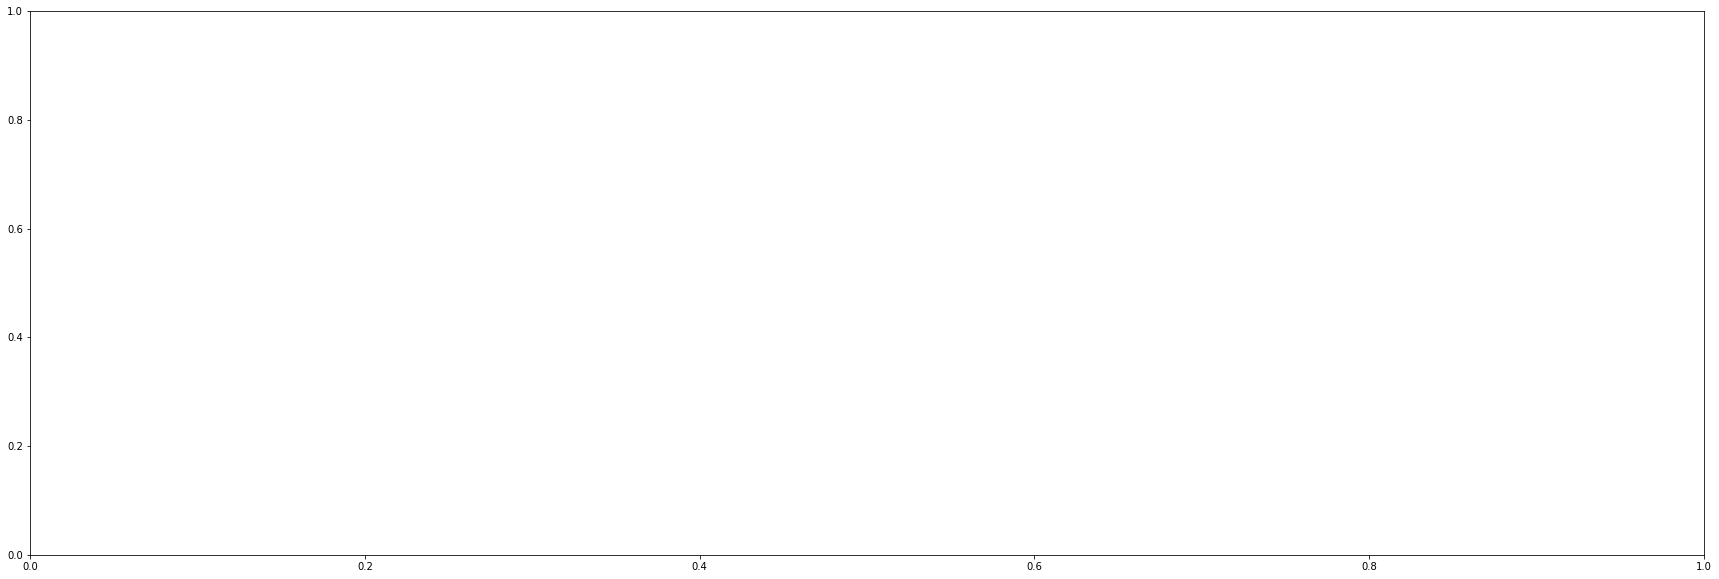

In [15]:
print(df)
plt.figure(figsize=(30, 10))
for i in range(1893, 1893+10):
    plot_date(df, i)

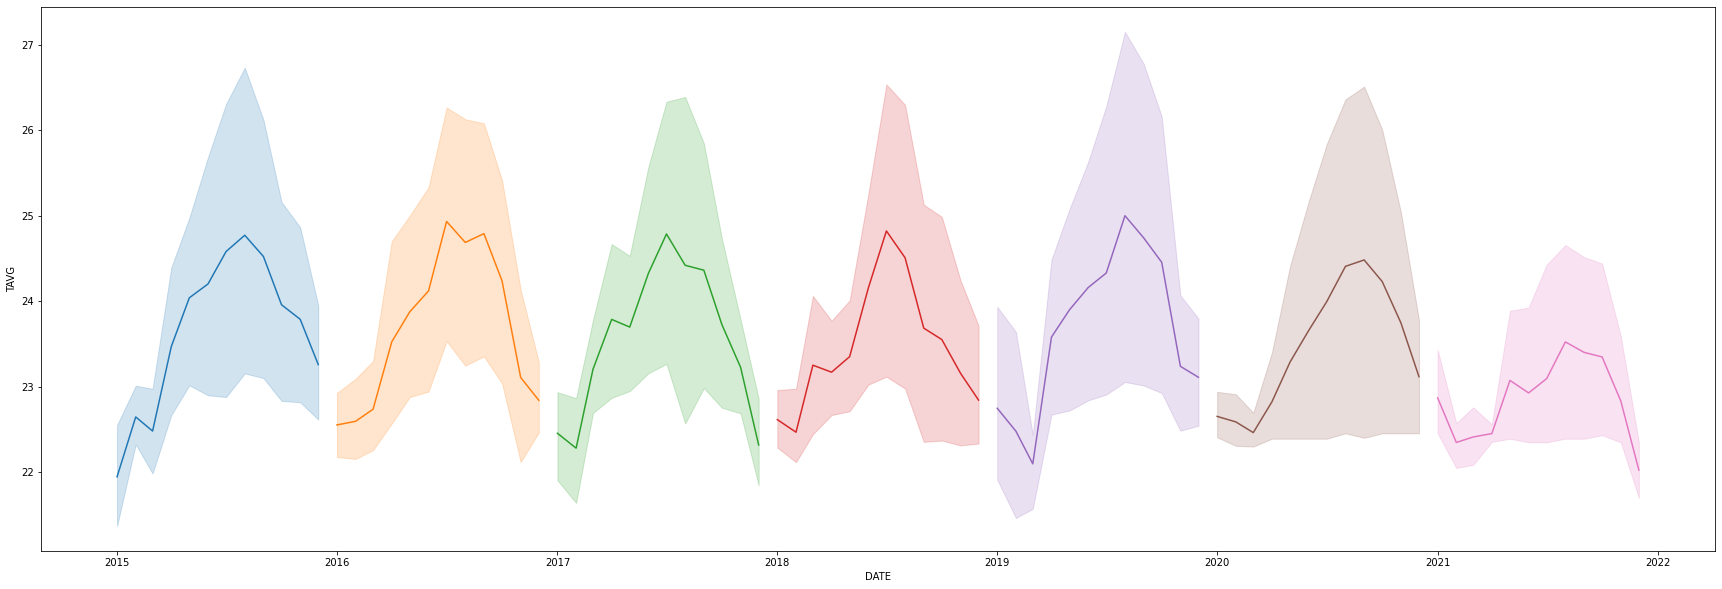

In [10]:
plt.figure(figsize=(30, 10))
for i in range(2015, 2022):
    plot_date(df, i)

In [11]:
valid_columns = []
for col in df.columns:
    if 'ATTRIBUTES' not in col and col not in ['TMIN', 'TMAX', 'TAVG'] and df[col].dtype == np.float64:
        valid_columns.append(col)
len(valid_columns)

34

/home/hungt1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


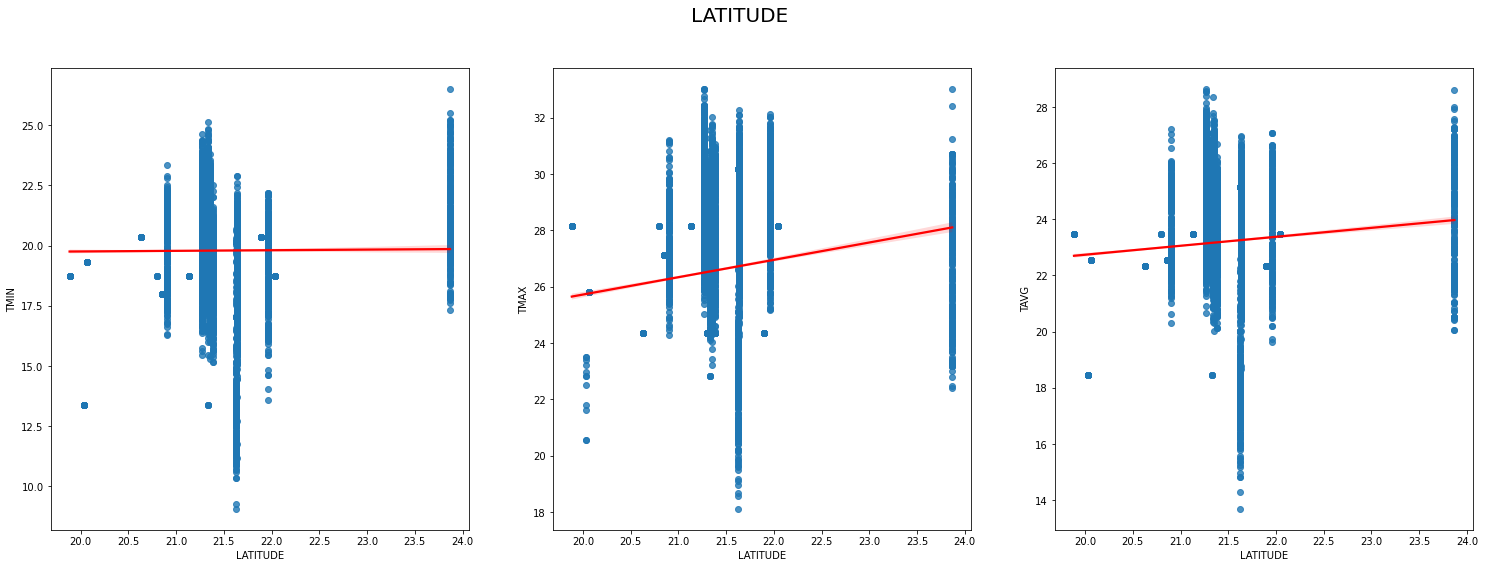

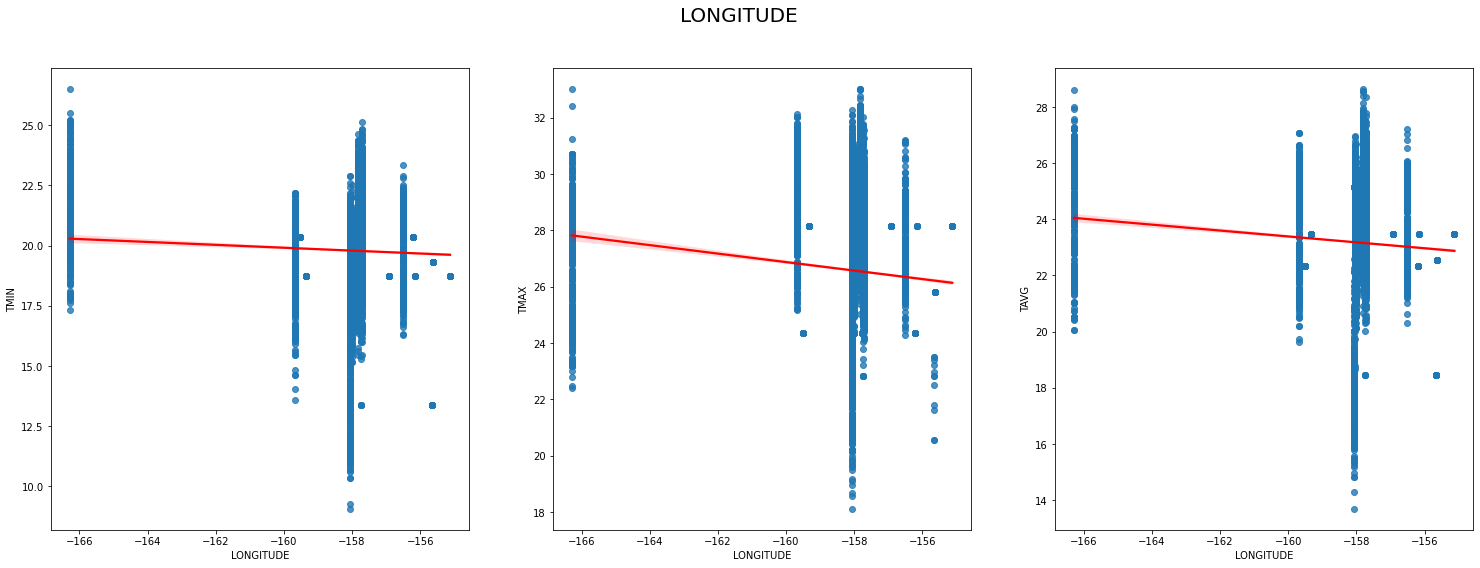

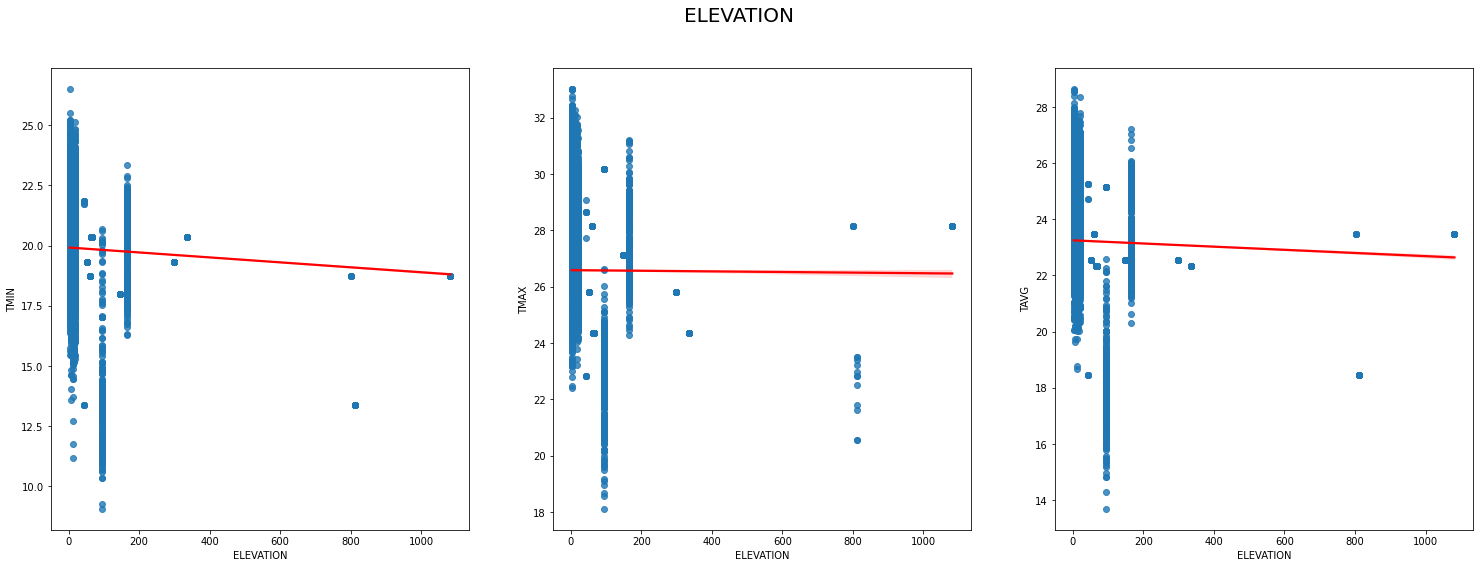

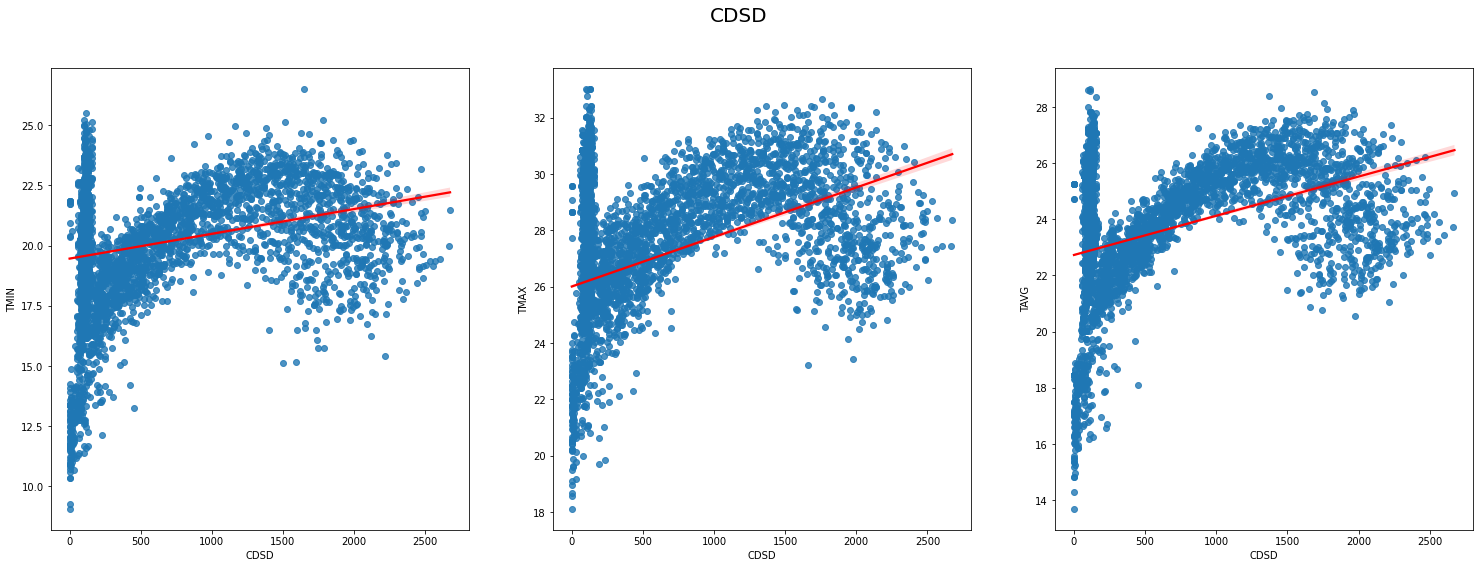

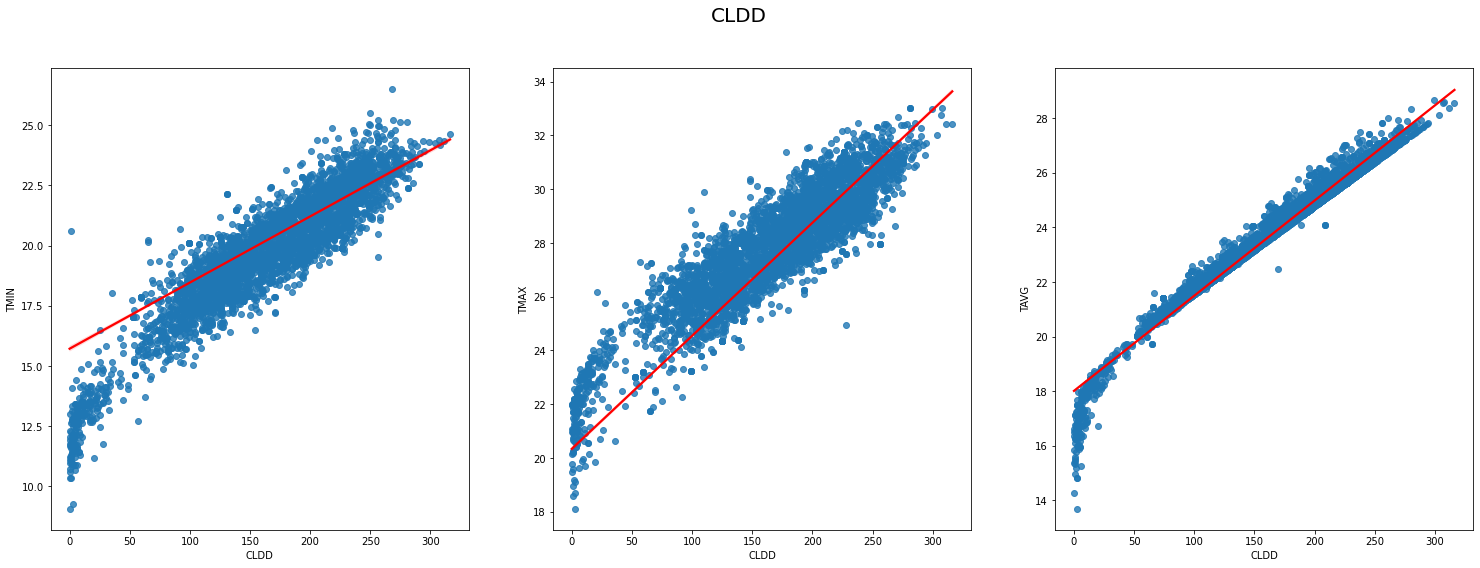

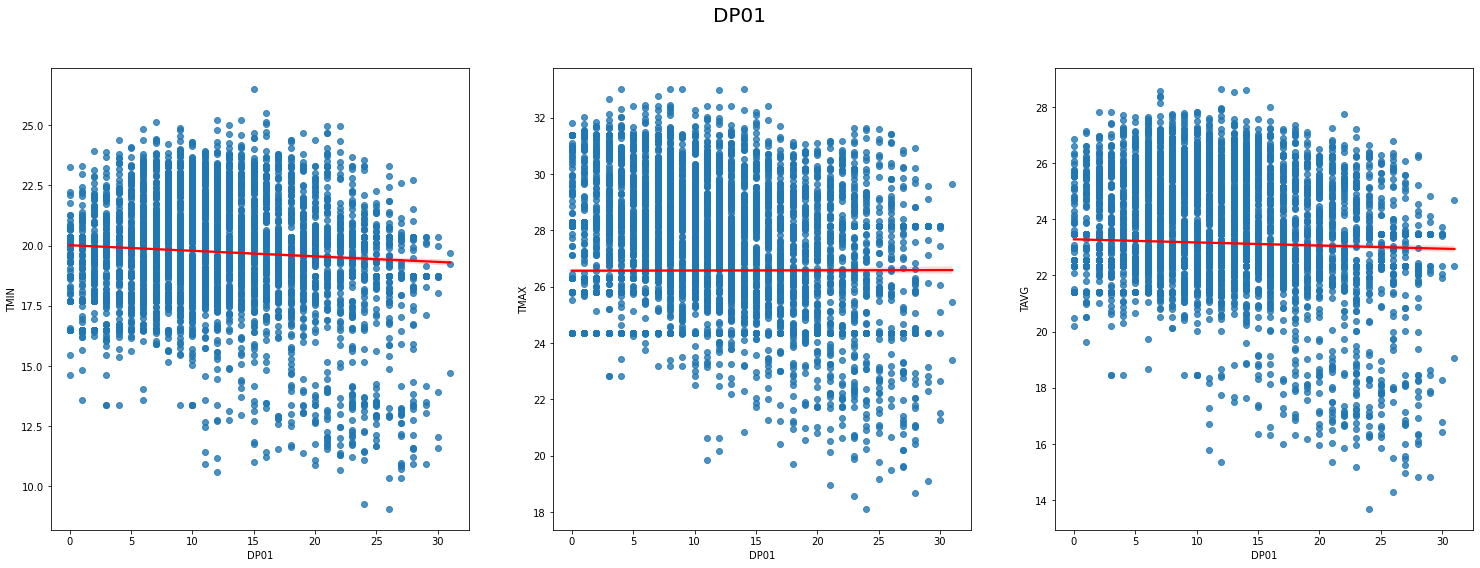

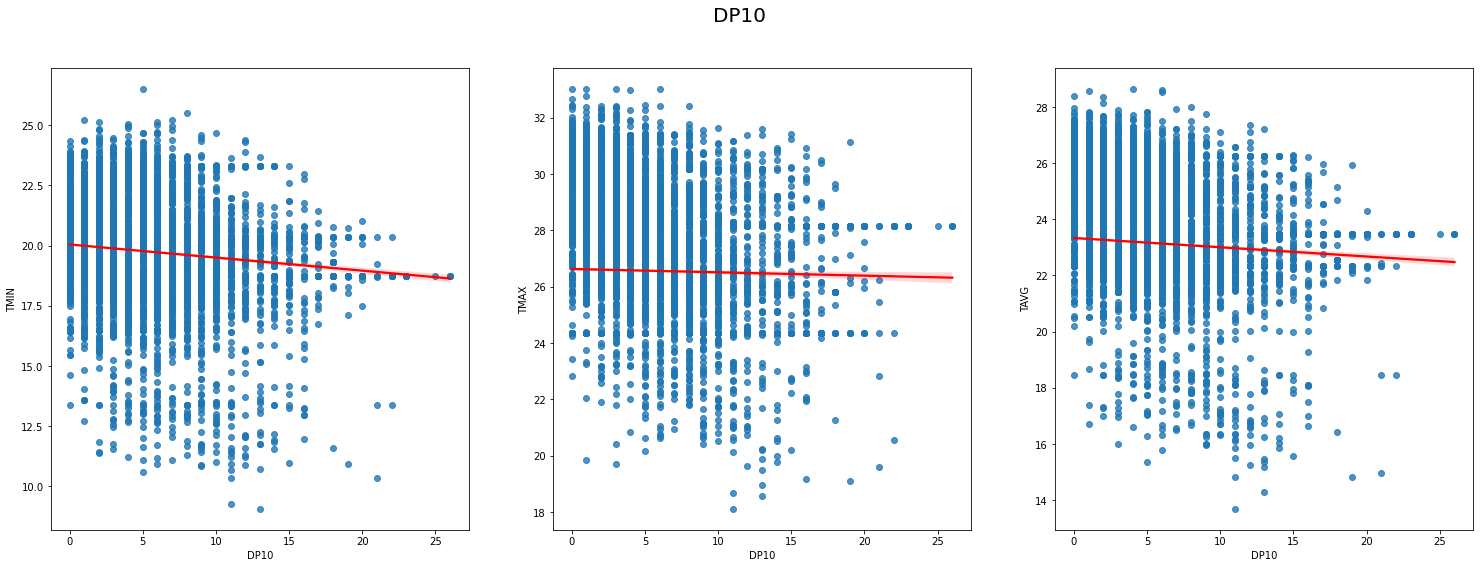

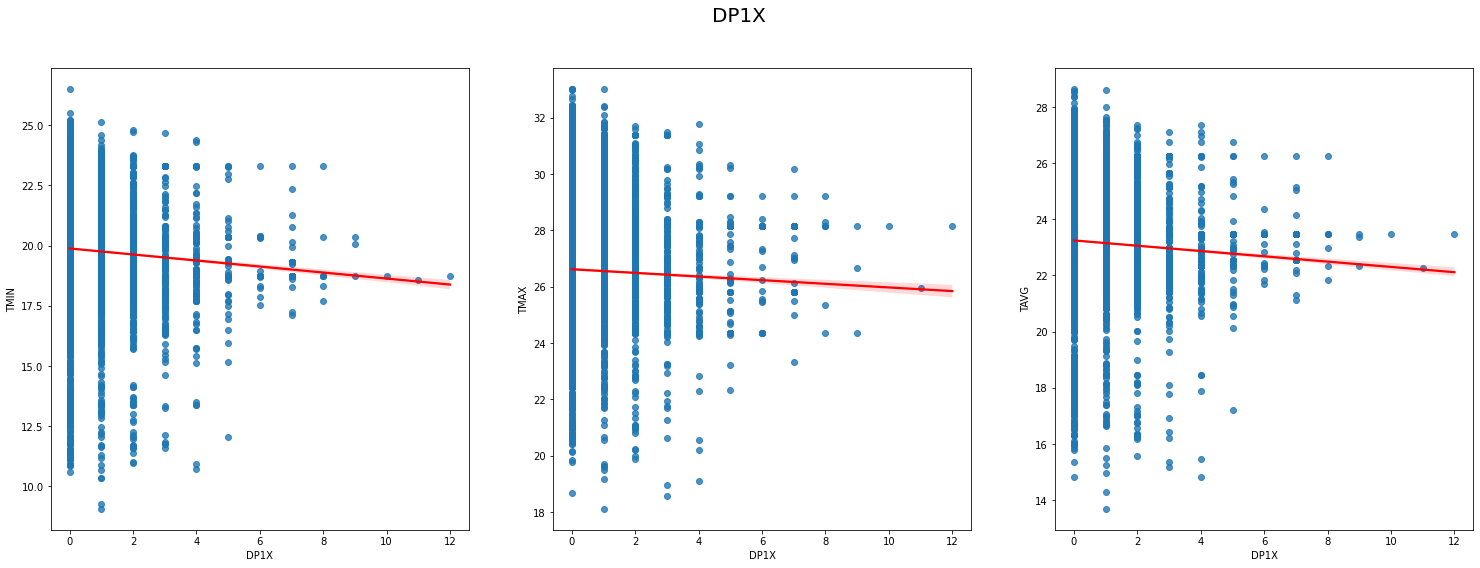

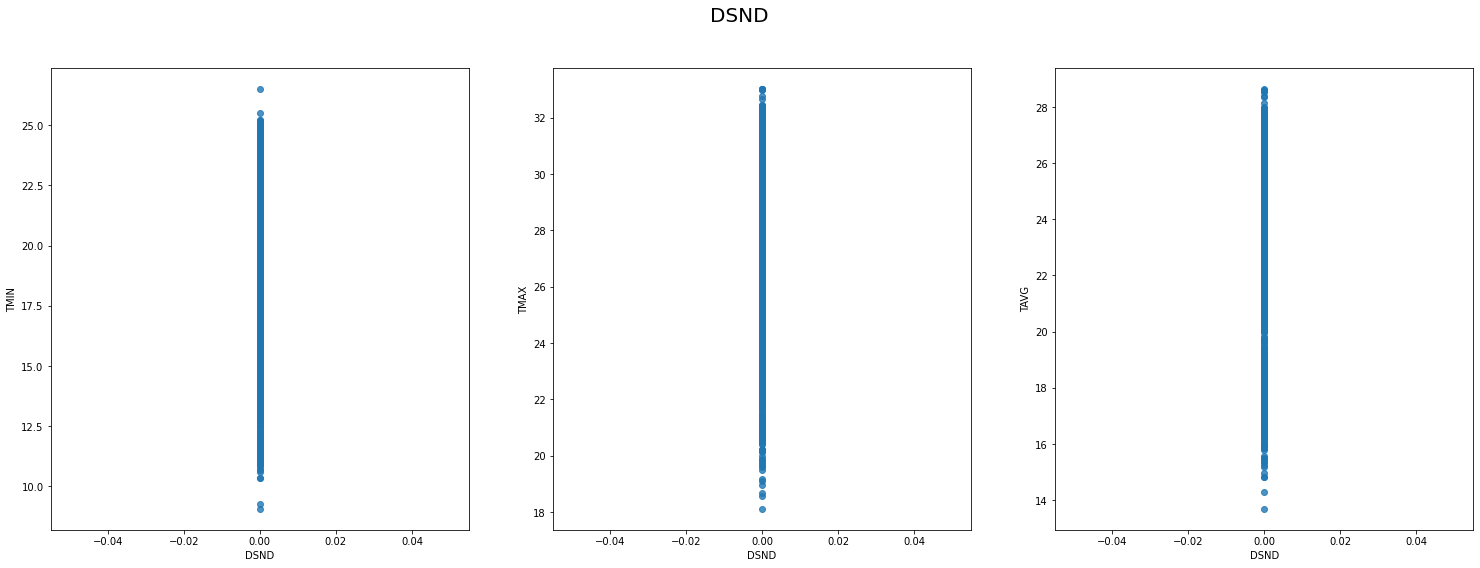

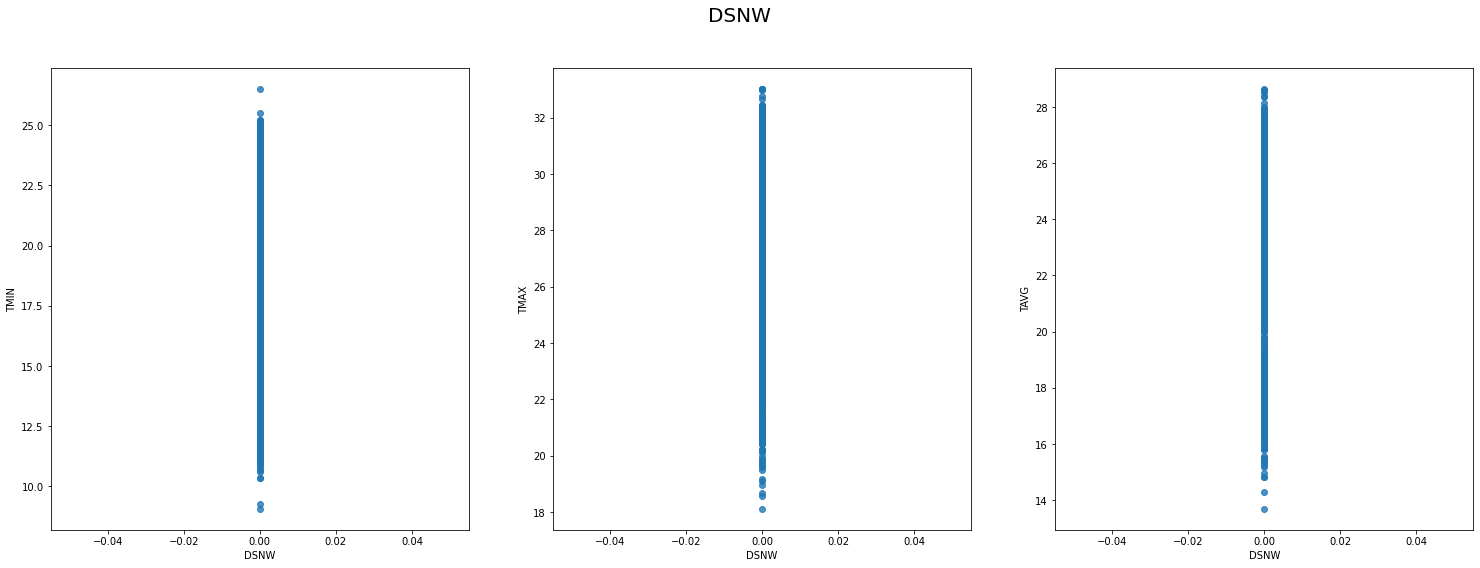

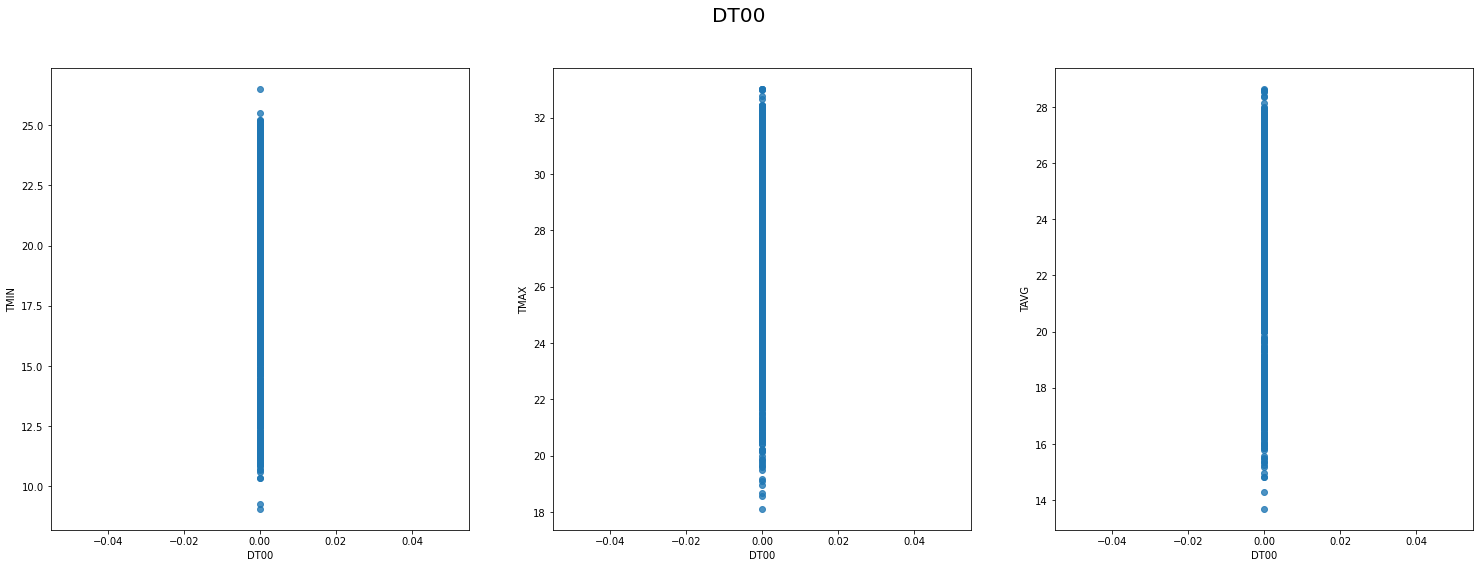

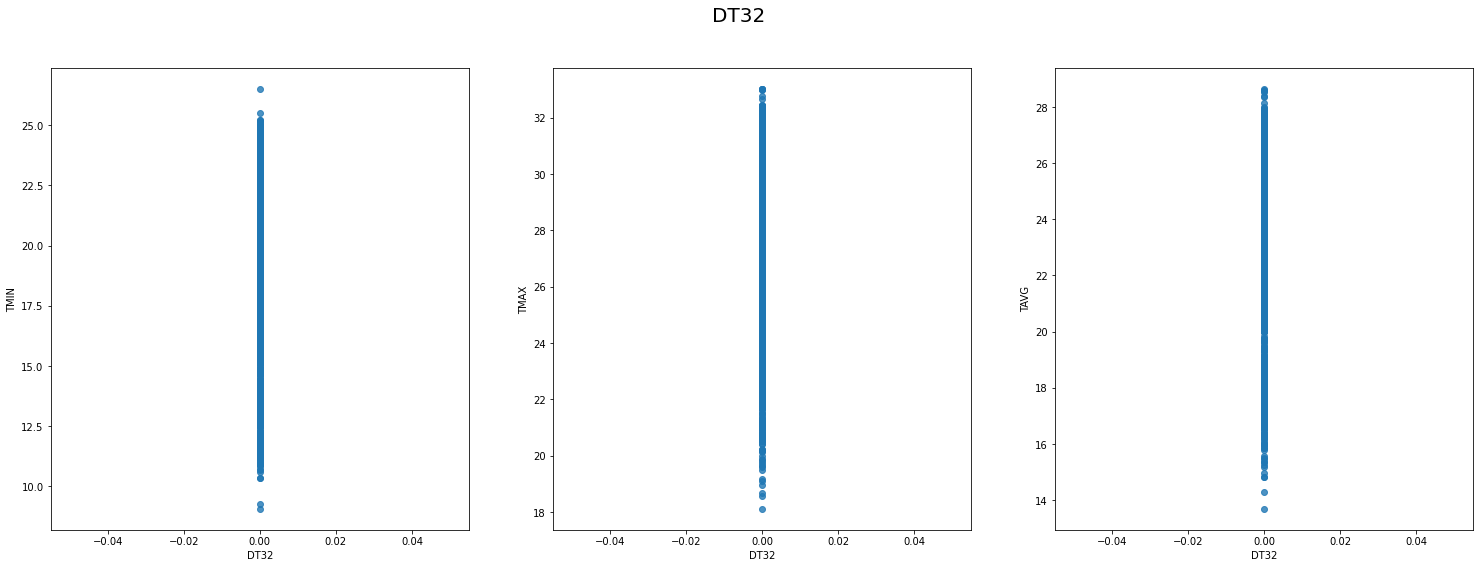

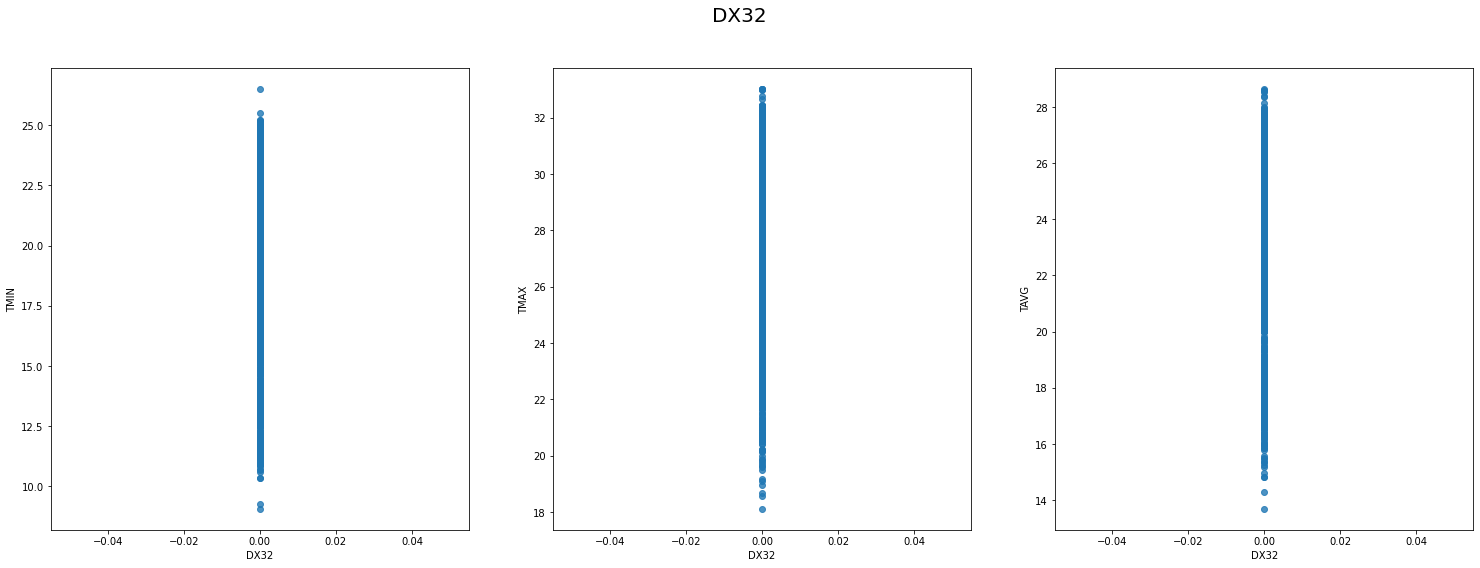

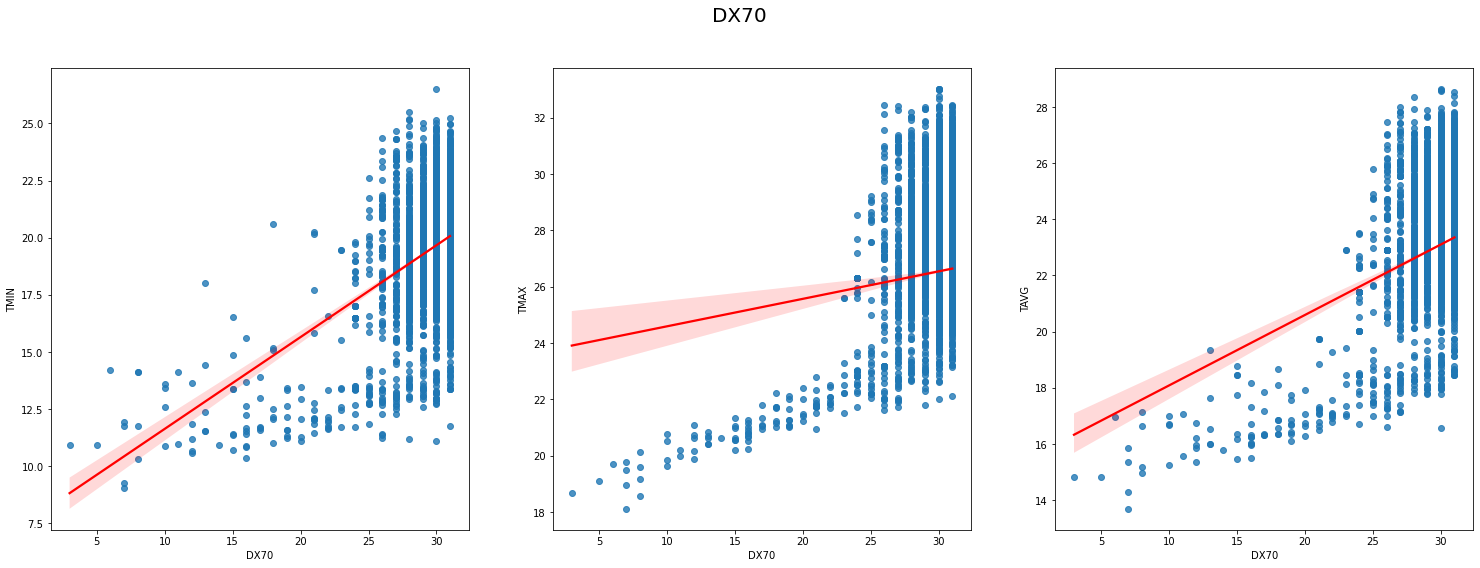

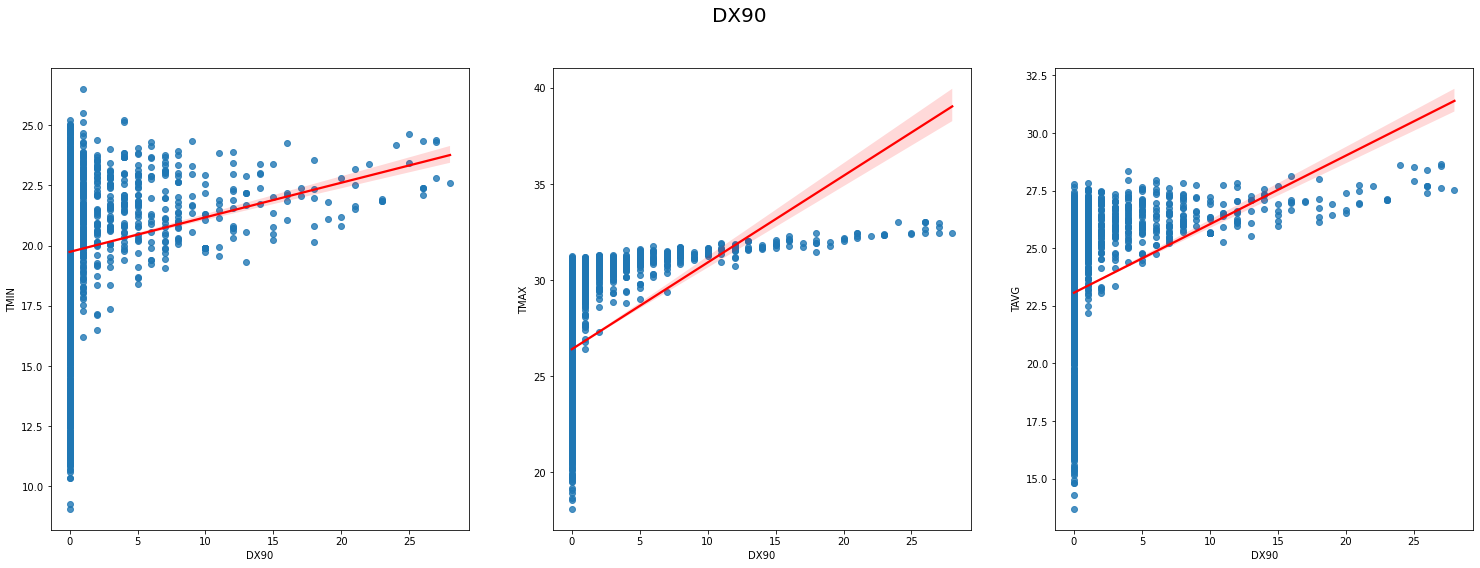

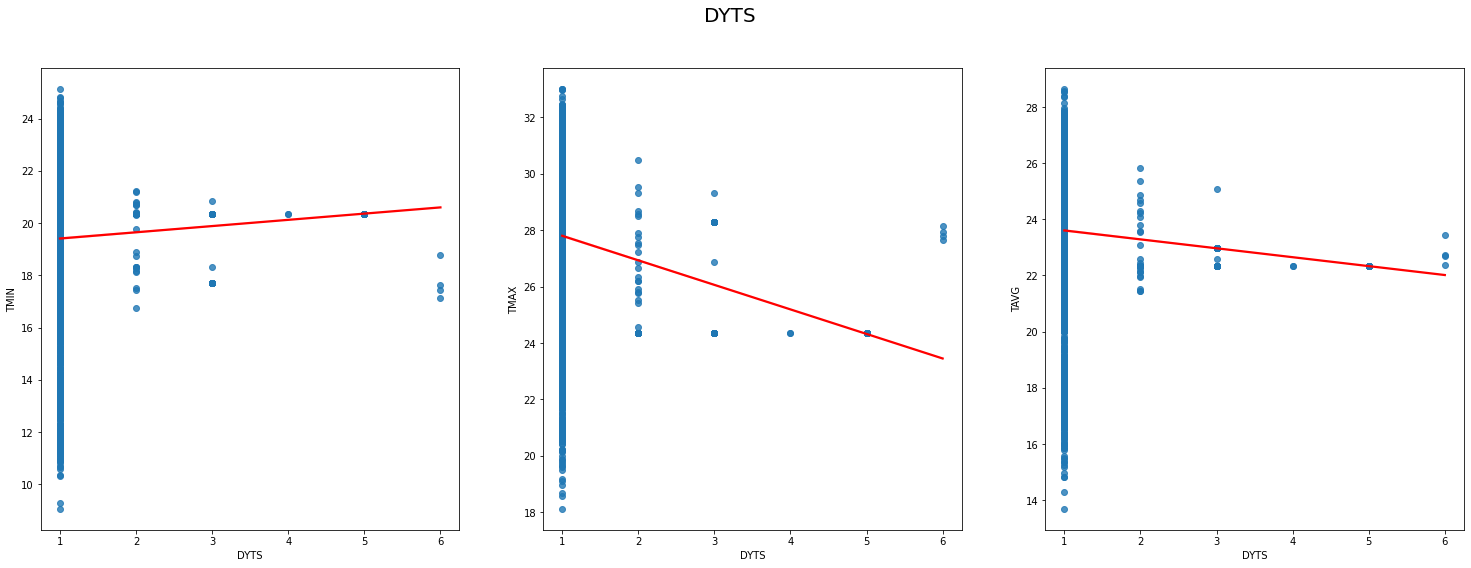

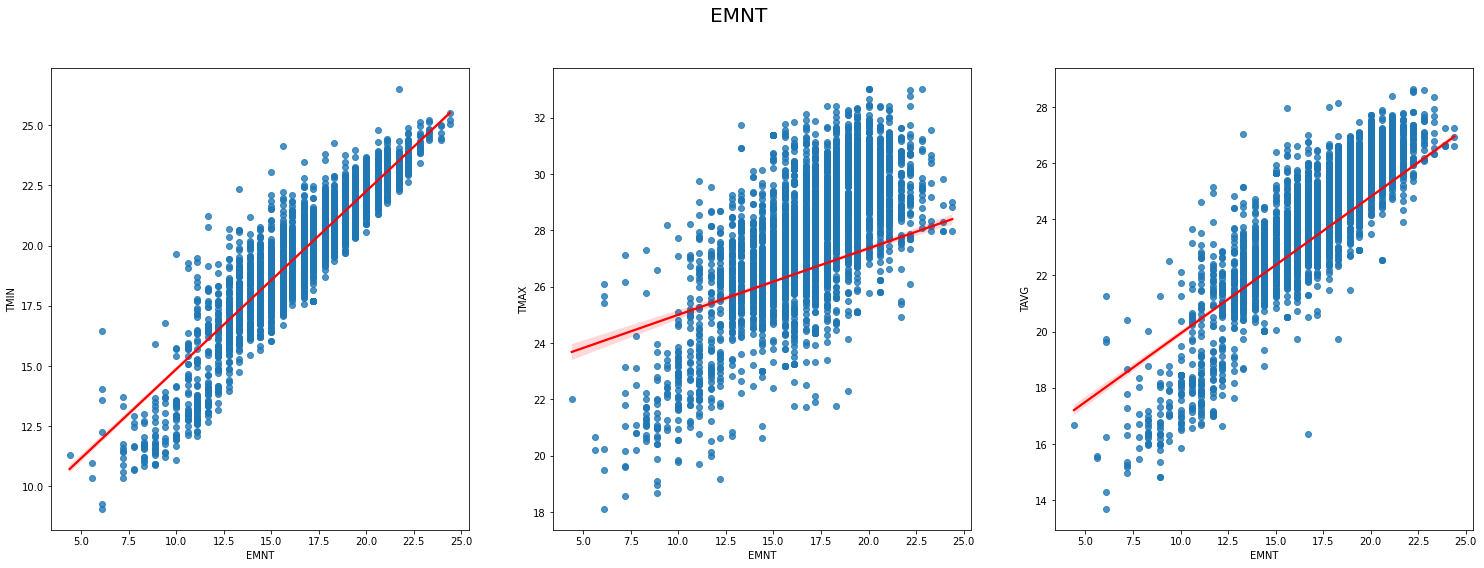

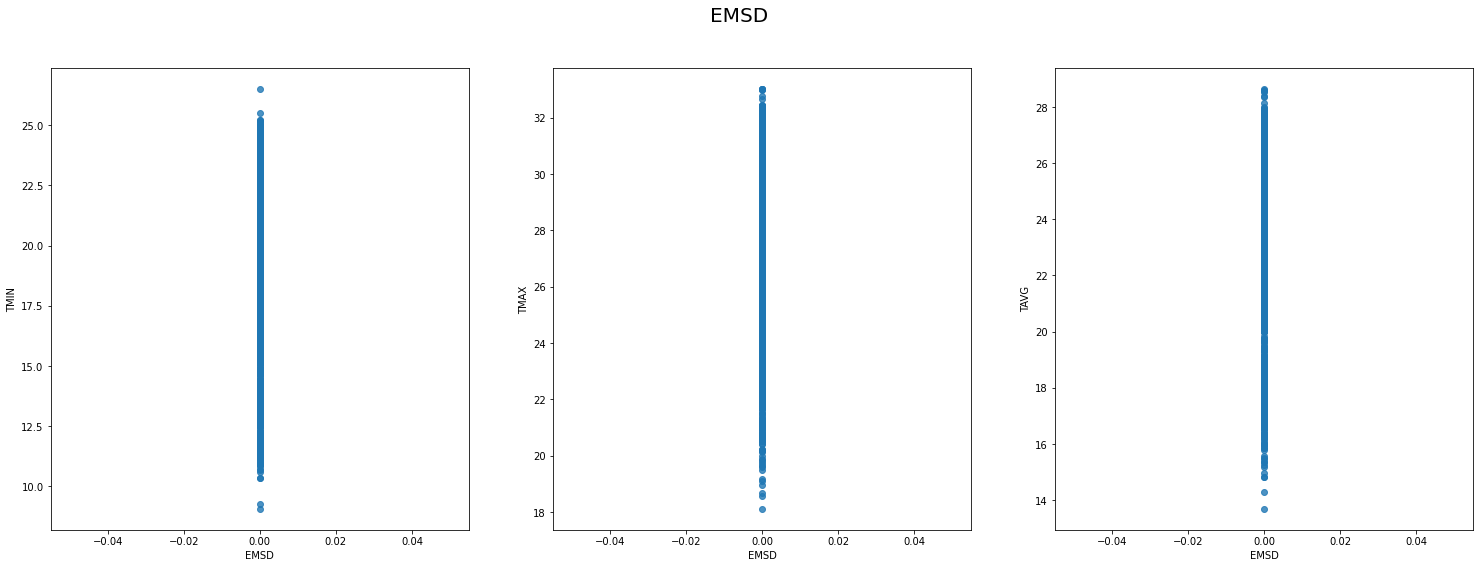

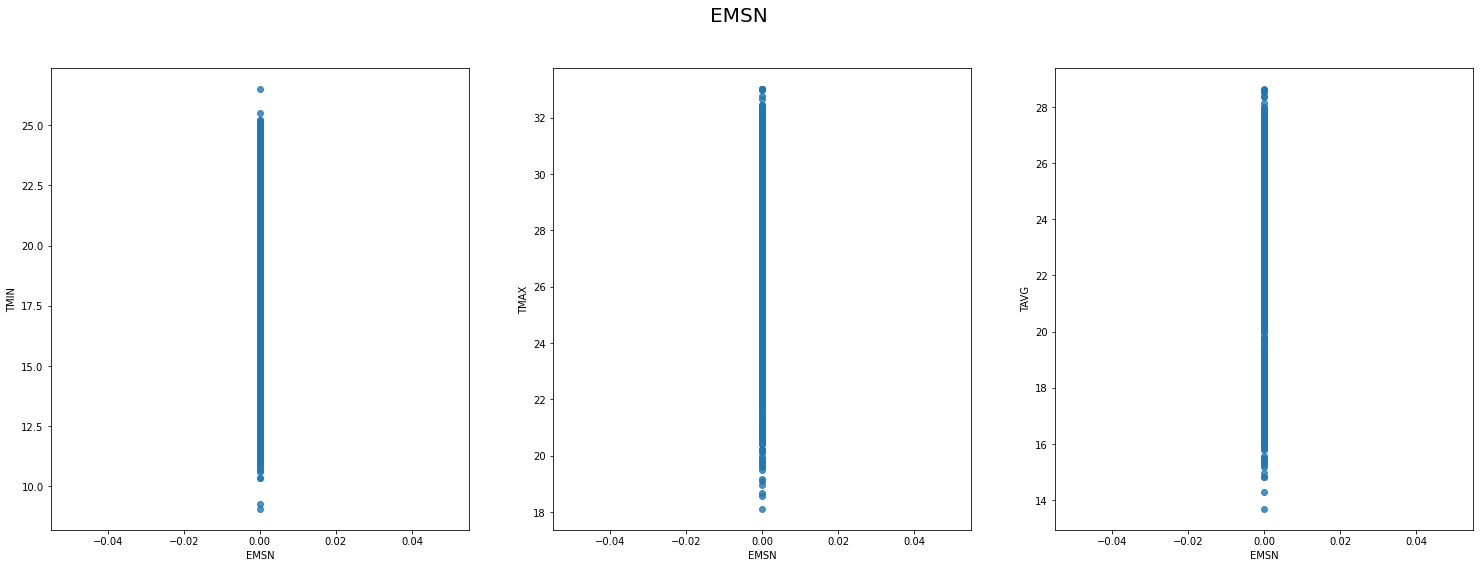

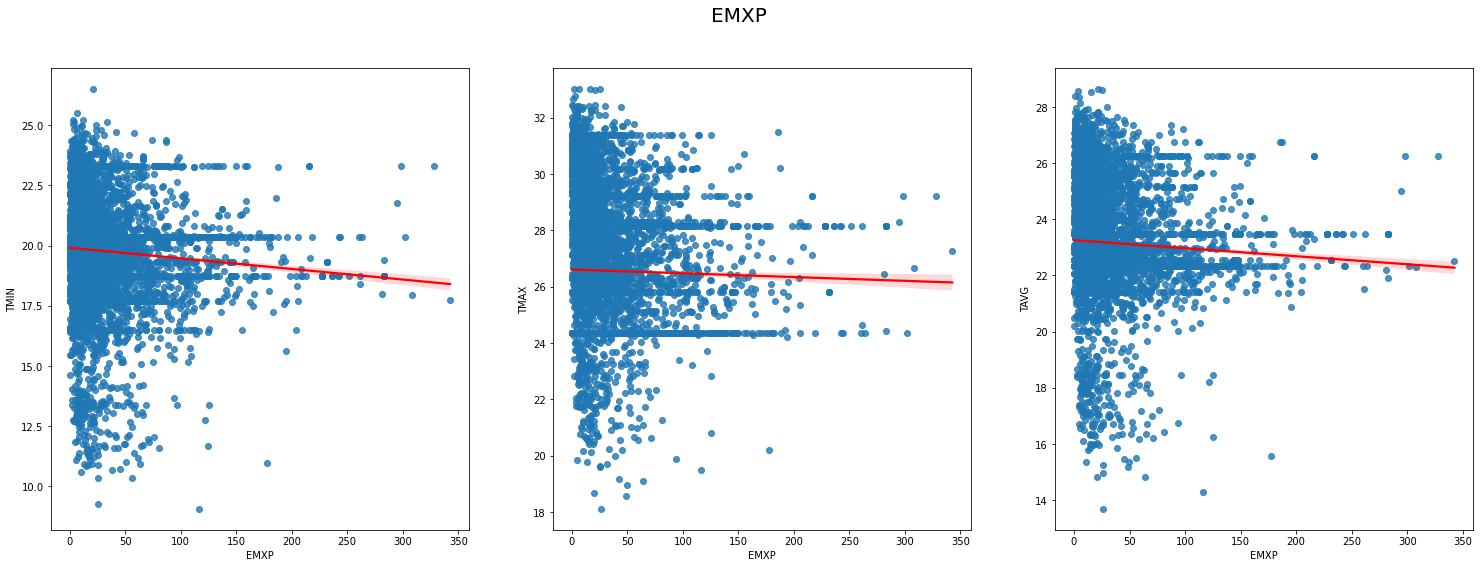

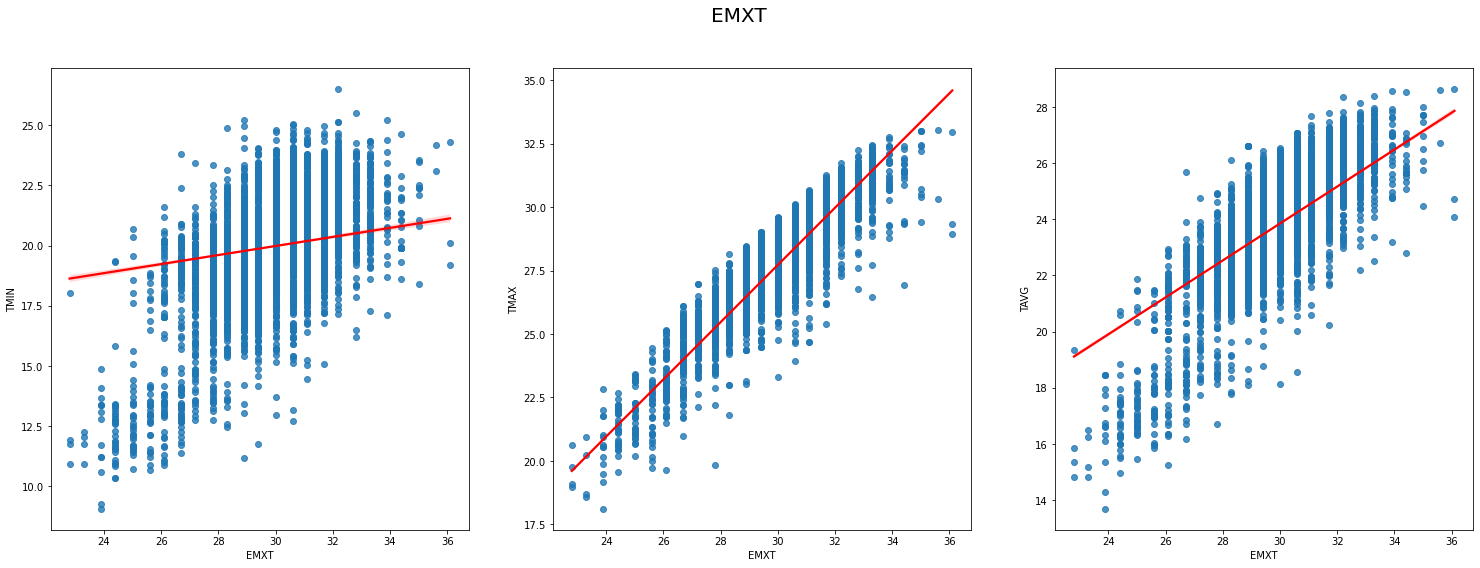

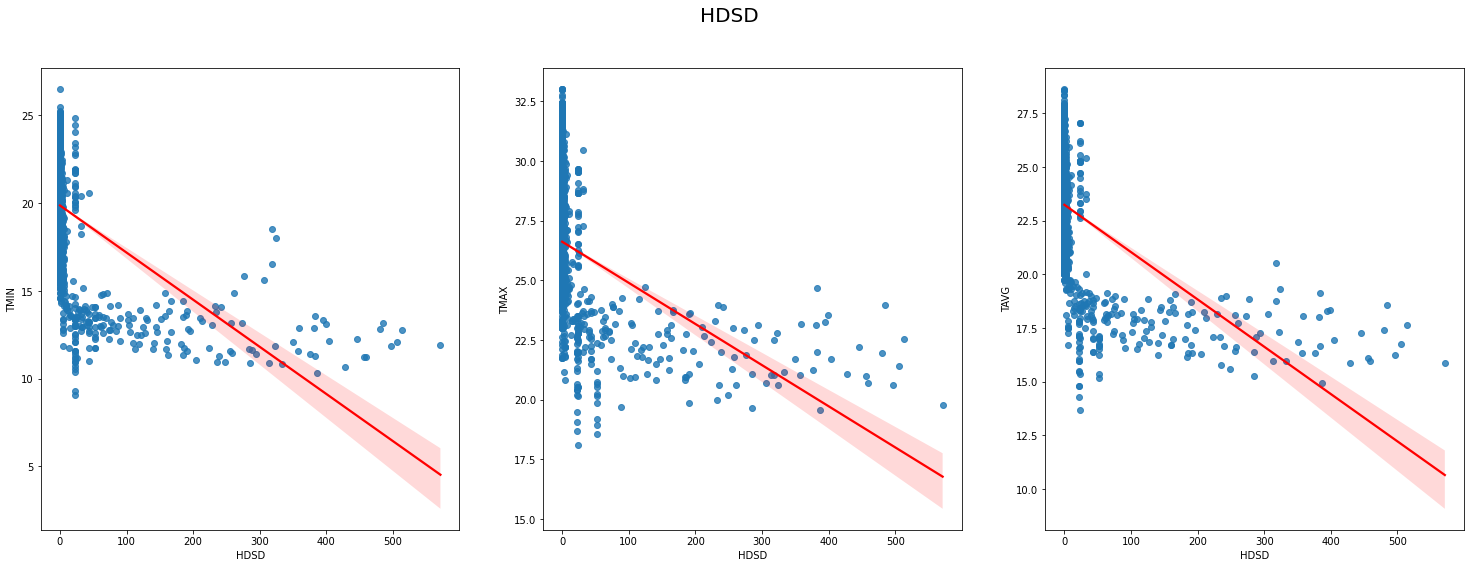

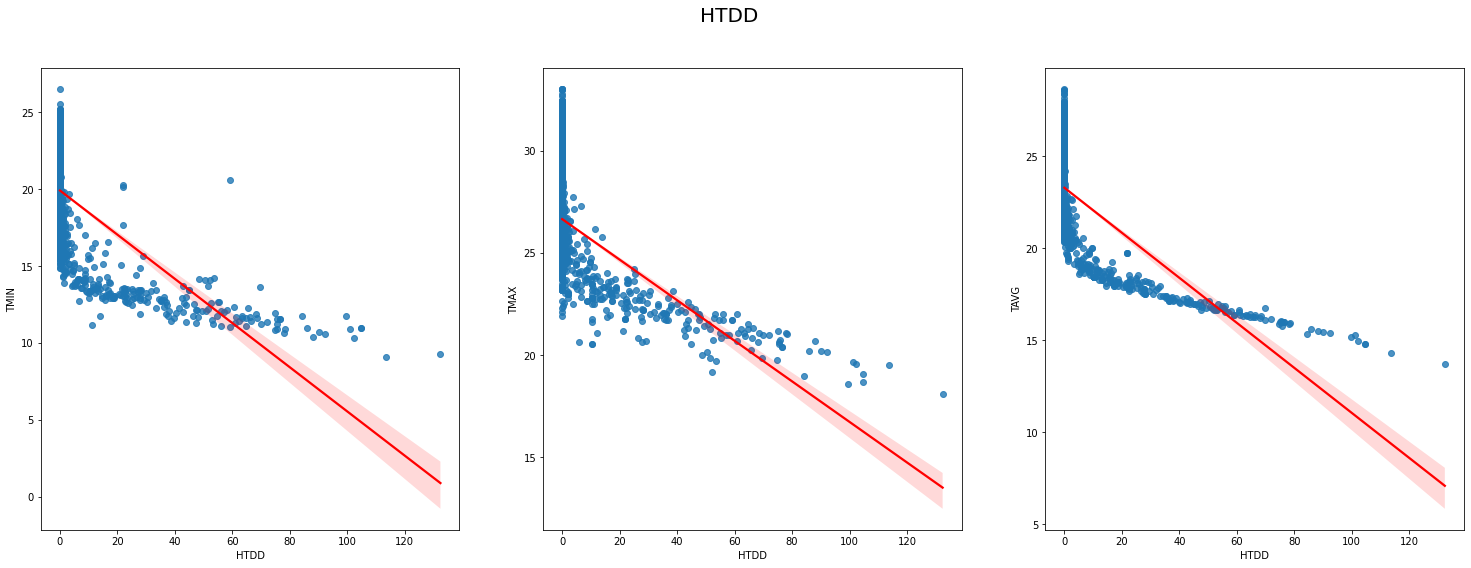

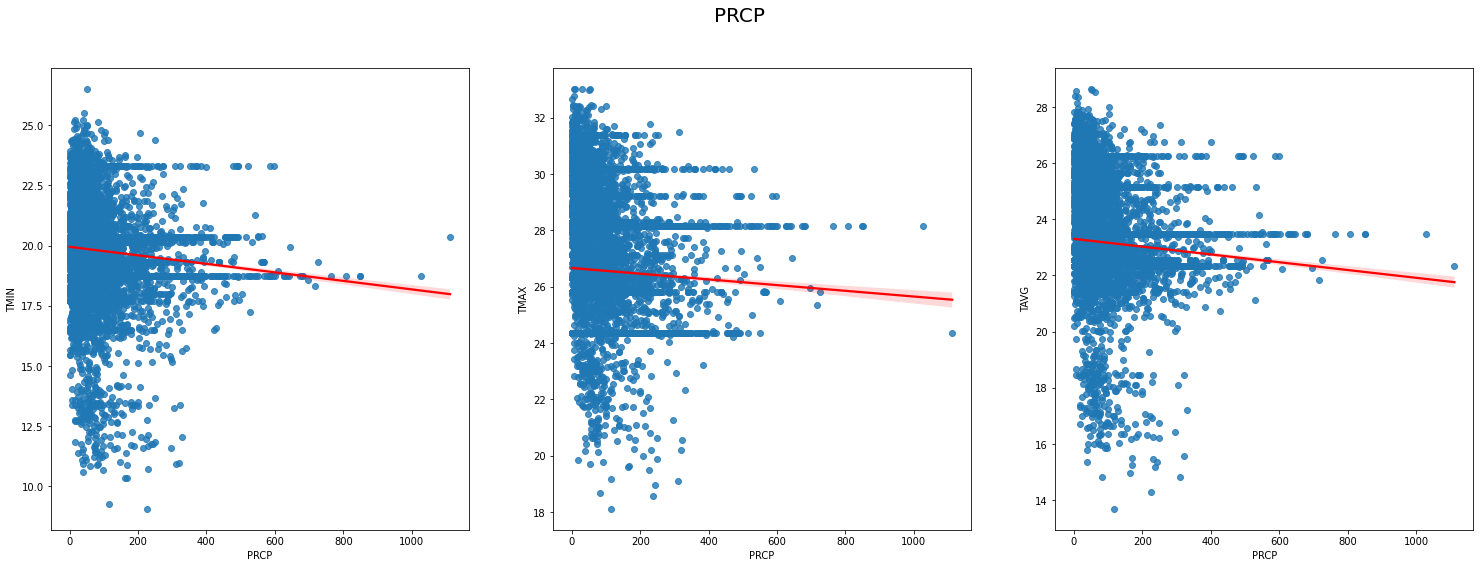

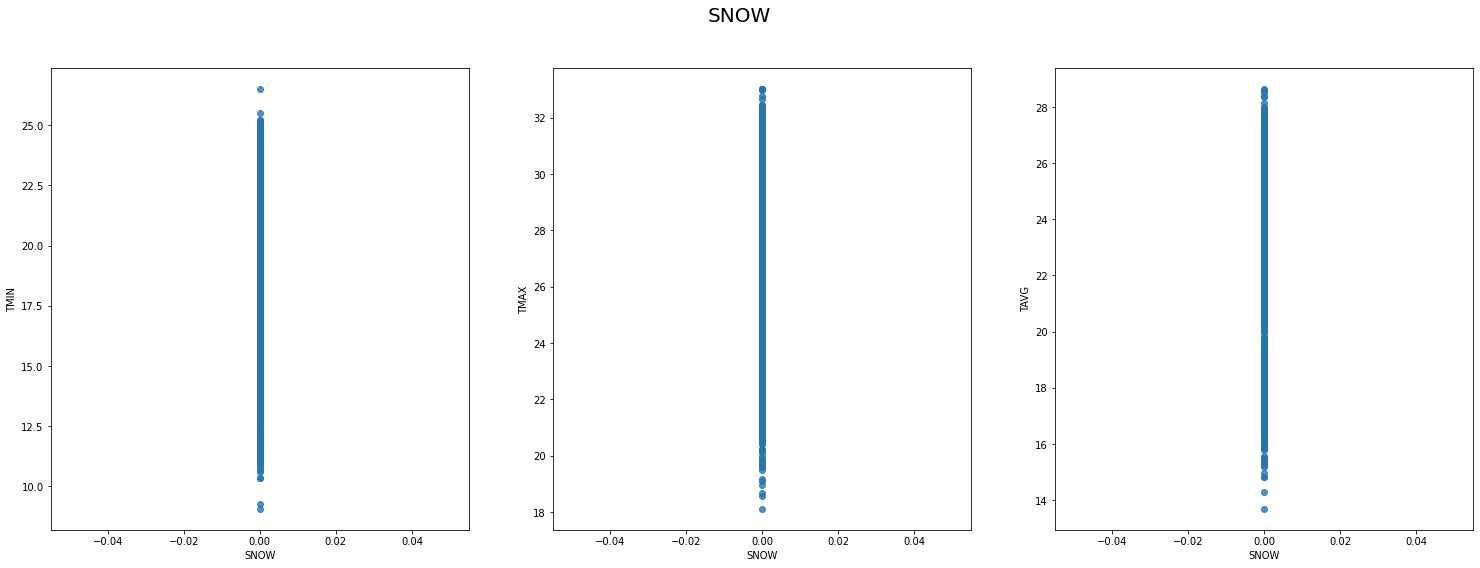

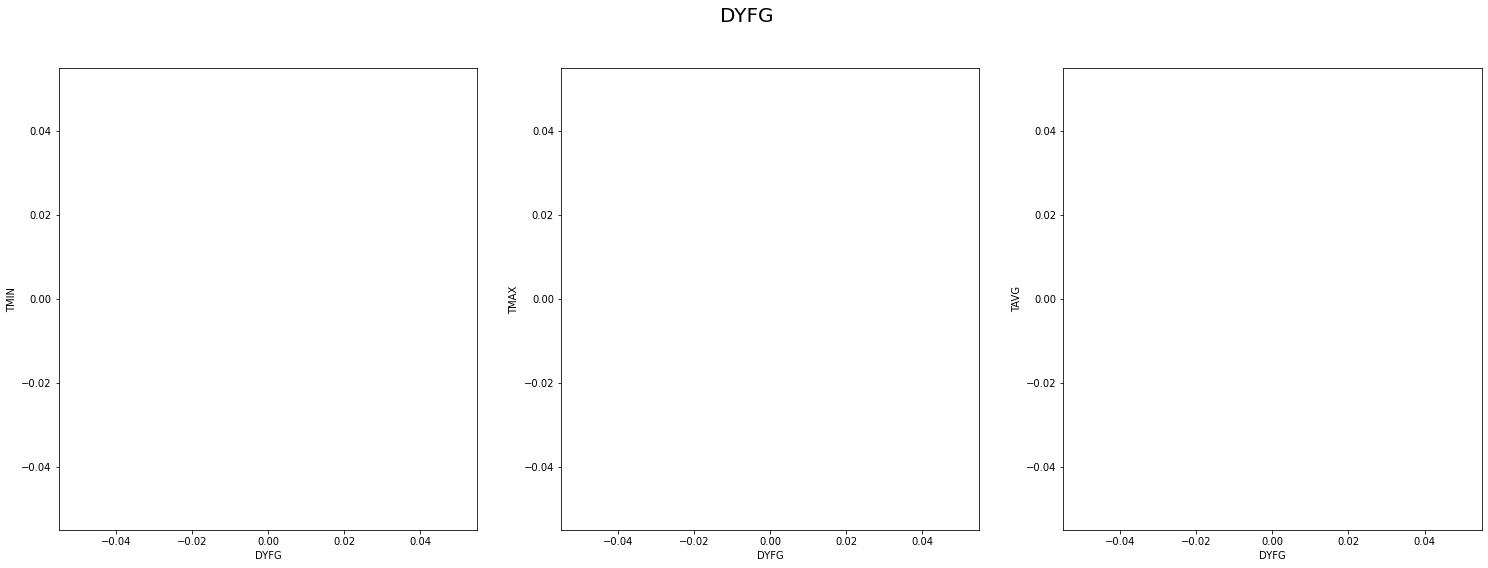

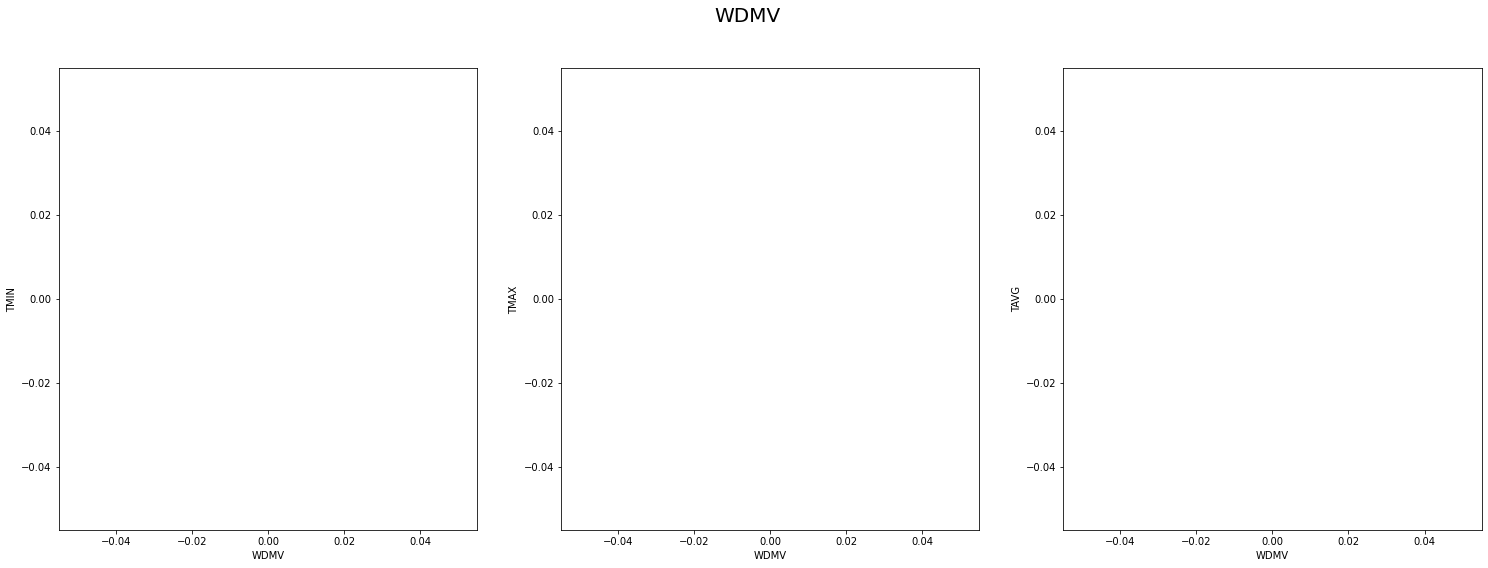

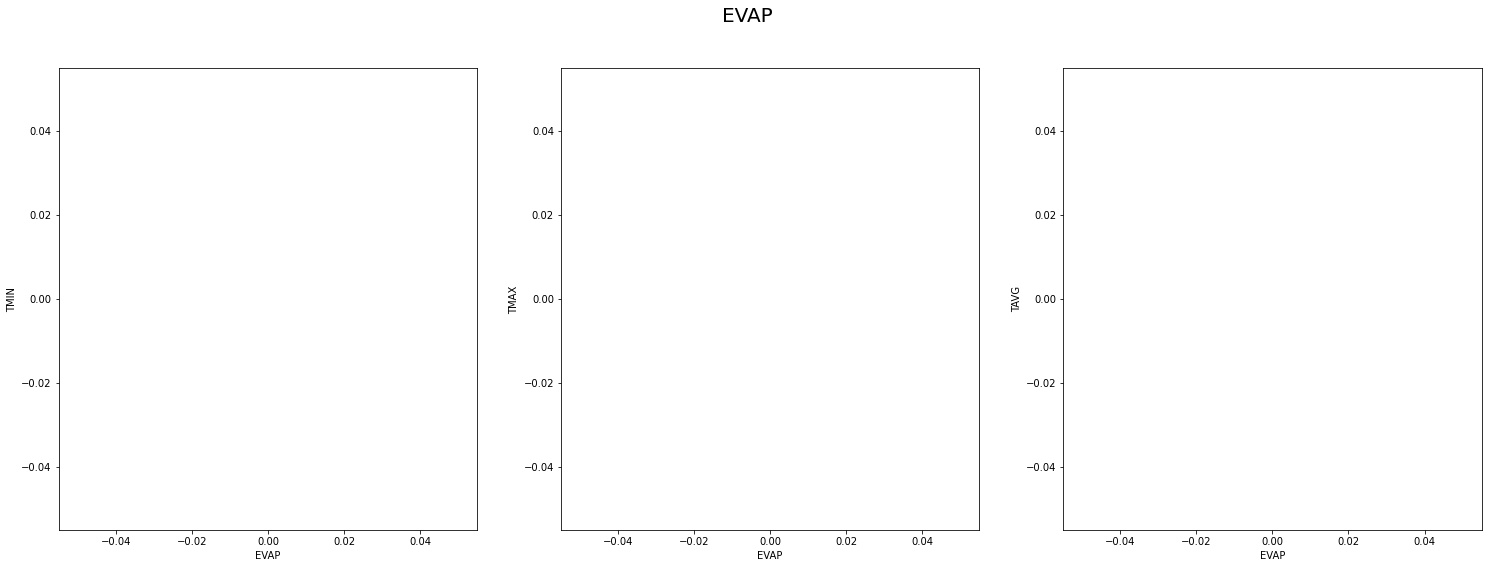

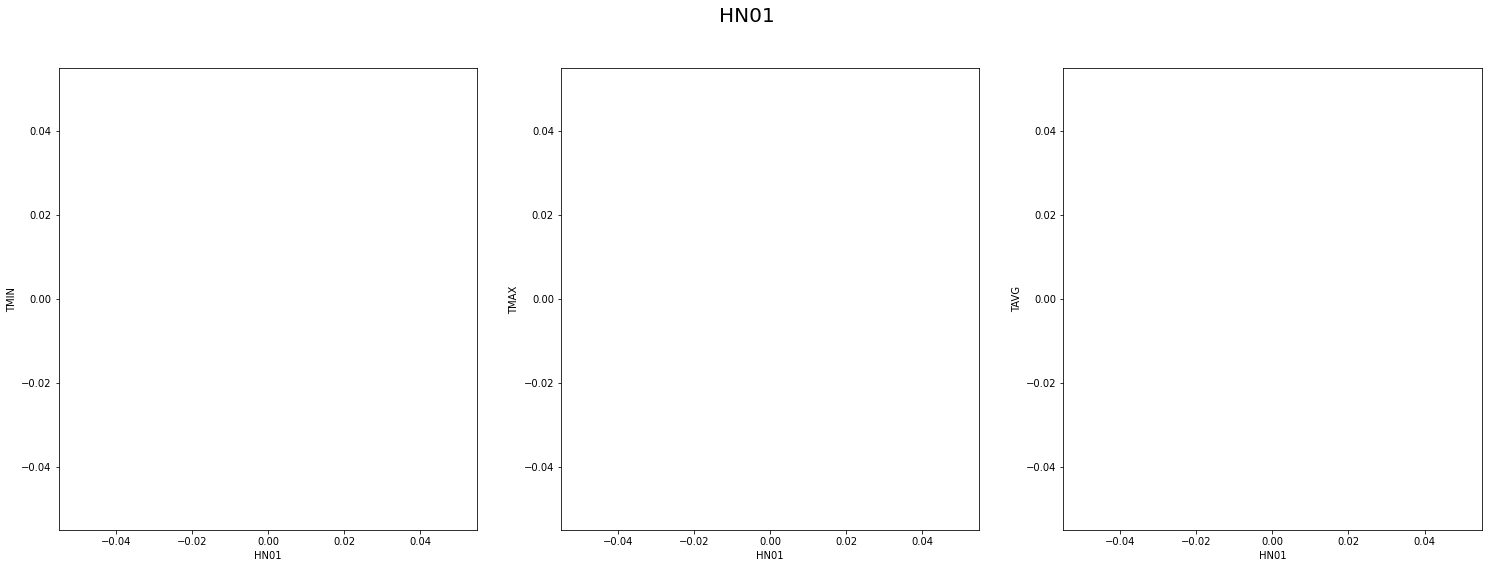

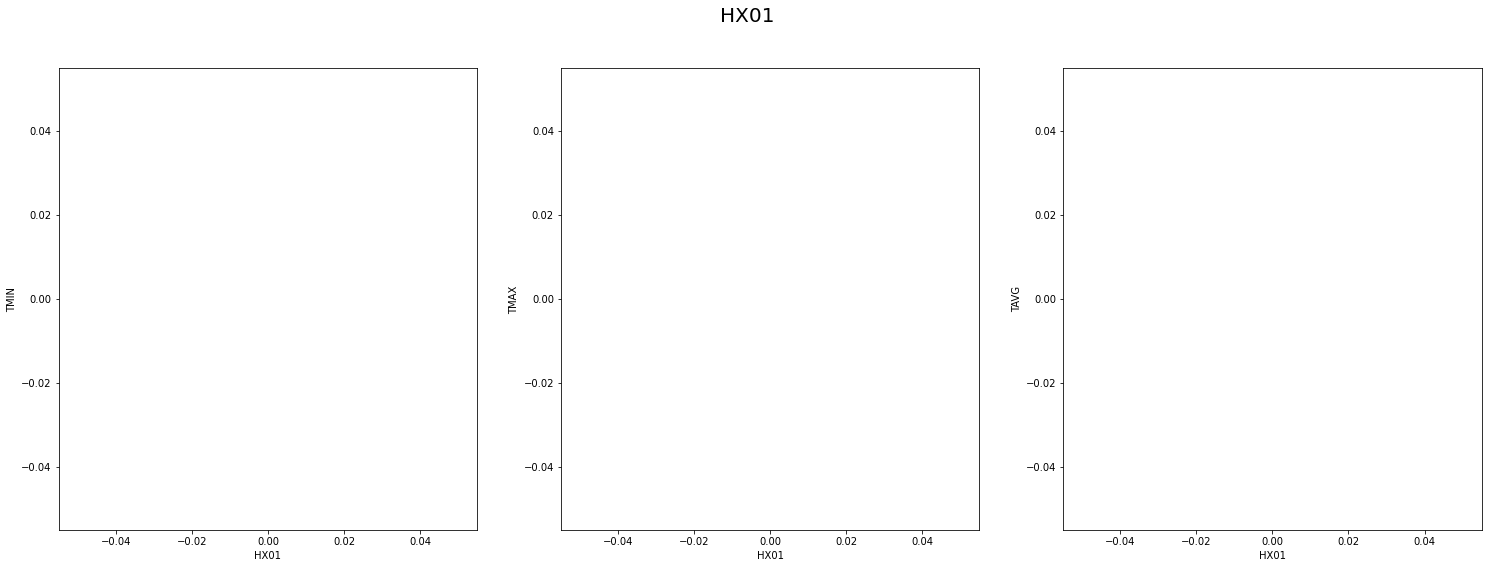

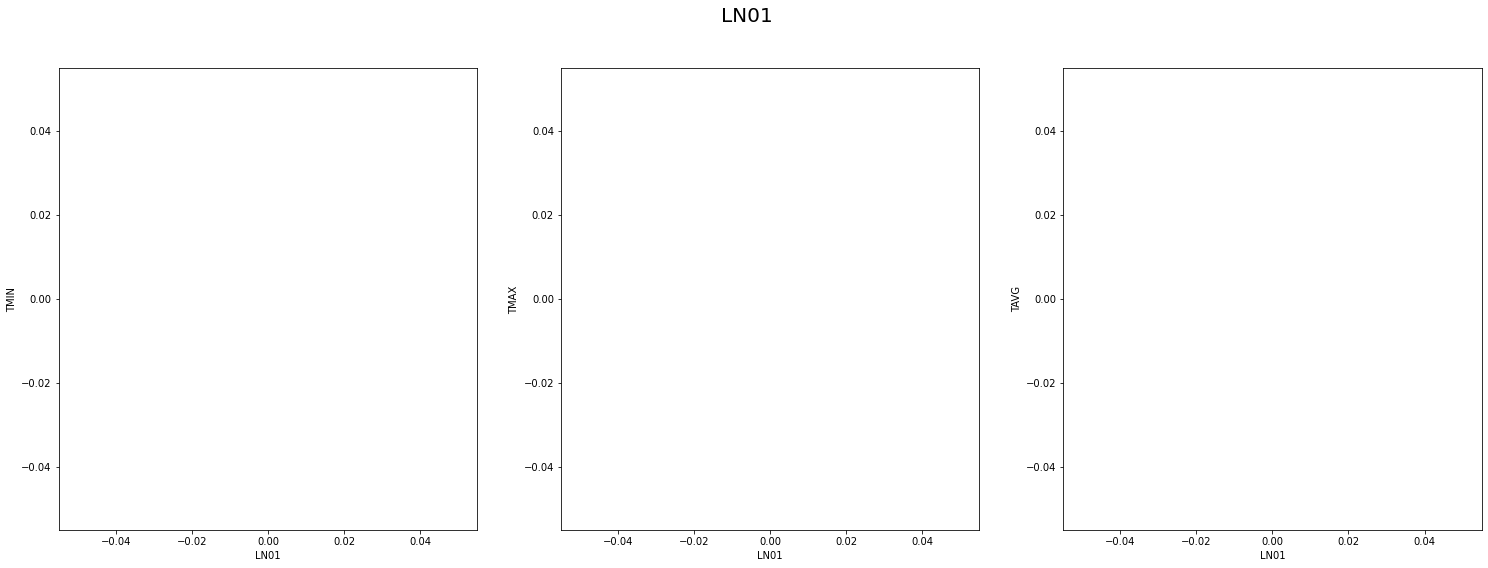

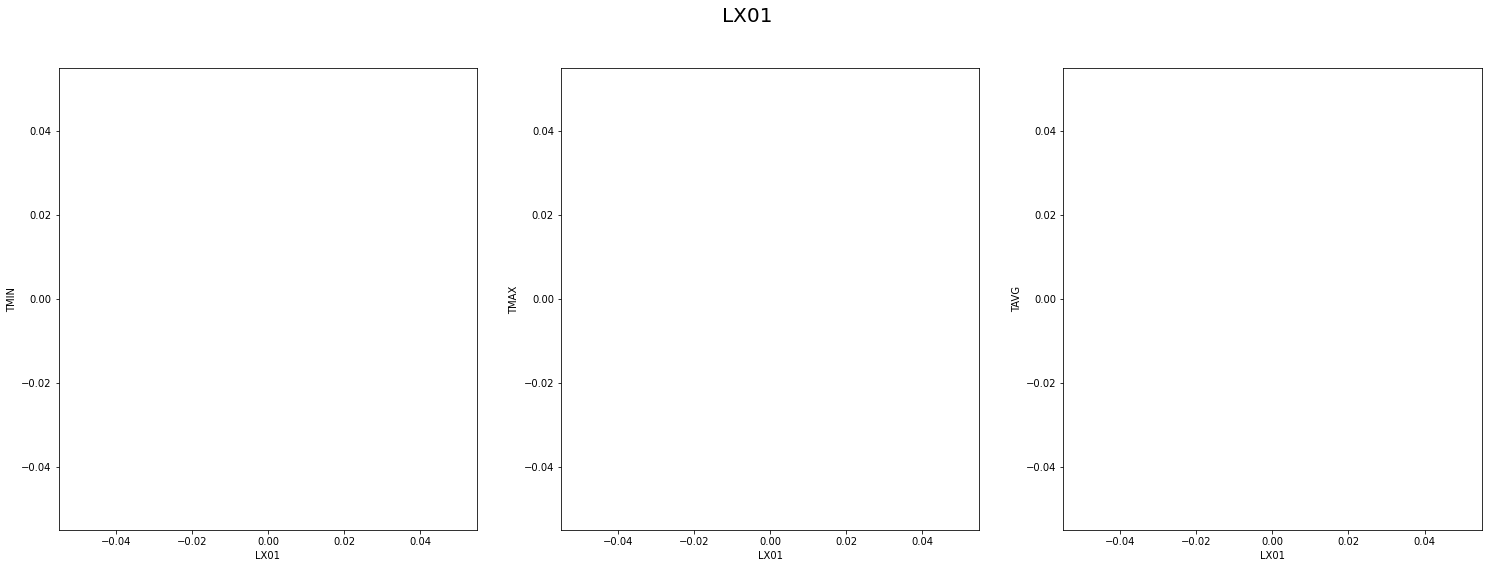

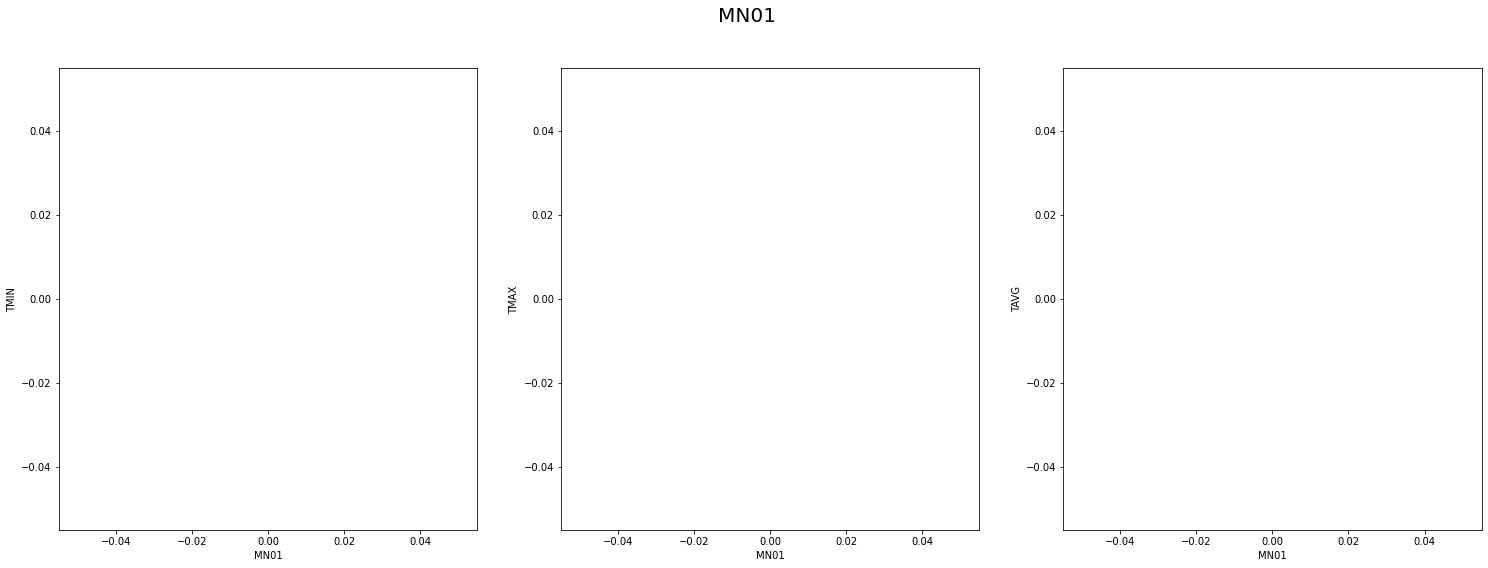

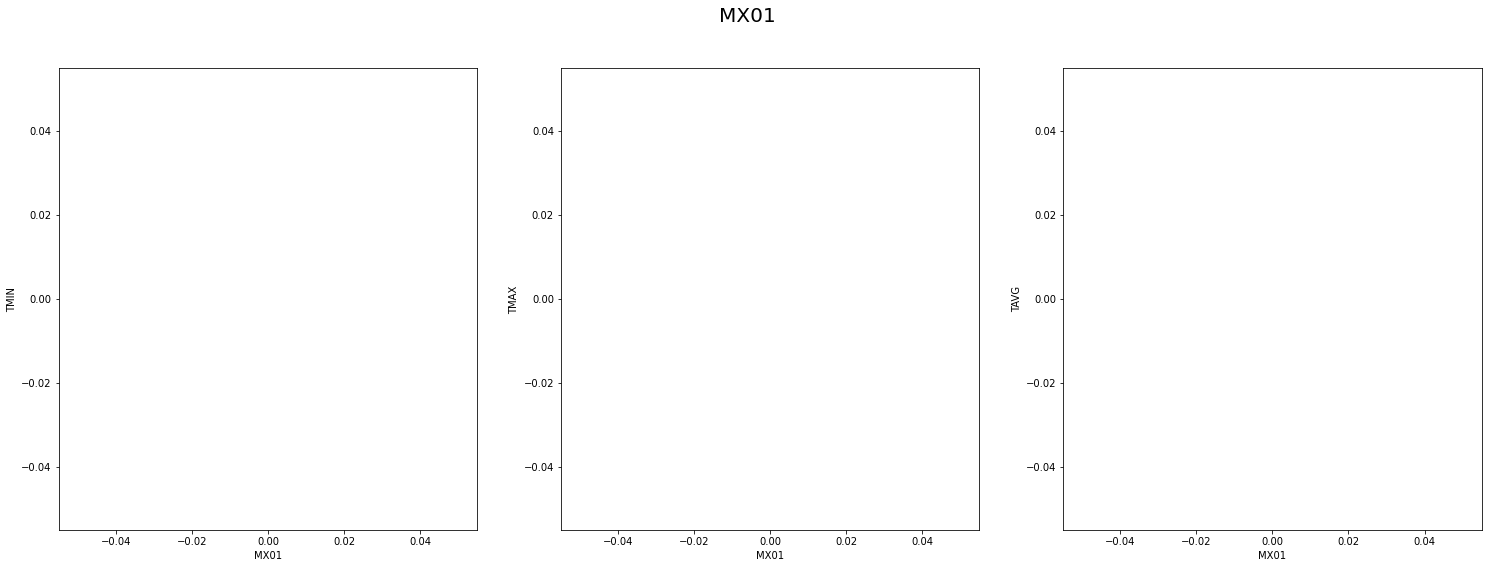

In [12]:
kwargs = {'data':df, 'line_kws':{"color": "red"}}
for valid_col in valid_columns:
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(25.5, 8.5)
    sns.regplot(ax=axes[0], x=valid_col, y="TMIN", **kwargs)
    sns.regplot(ax=axes[1], x=valid_col, y="TMAX", **kwargs)
    sns.regplot(ax=axes[2], x=valid_col, y="TAVG", **kwargs)
    fig.suptitle(valid_col, fontsize=20)